# Analysis of Differentially Expressed Genes after HDAC inhibition treatment

_Author :_ Natalia Garcia Sánchez

_Date :_ 20/02/2023

_Description :_ Analysis of Differentially Expressed Genes (DEGs) related with **Autophagy**, **oxidative stress**, **miRNA regulation** in Histone Deacetilase (HDAC) inhibition experiments in Microspore Embryogenesis (ME)

---

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as vplt

**Importing data about annotated autophagy related (ATG) genes**

Source : *In Silico Analyses of Autophagy-Related Genes in Rapeseed (Brassica napus L.) under Different Abiotic Stresses and in Various Tissues (2020) (doi: 10.3390/plants9101393)*

In [61]:
df_ATG = pd.read_csv('/home/famgarcia/Bnapus_ME/Supplementary Material Repository (SMR)/AnnotationRetrieval/ATG_genes.tsv', sep = "\t")

In [62]:
df_ATG.rename(columns={'Gene\tName':'gene_name', 'Locus':'gene_id'}, inplace=True)

In [63]:
df_ATG.head()

,gene_name,gene_id,Chromosome,Start,End,Strand,Length,MW,pI
0,BnATG1a,GSBRNA2T00124896001,chrA03,8190848,8194622,+,716,79.13,6.4
1,BnATG1b,GSBRNA2T00126489001,chrA04,3297987,3302544,-,713,79.20,8.3
2,BnATG1c,GSBRNA2T00099071001,chrA07,15415971,15419120,-,606,67.28,6.4
3,BnATG1d,GSBRNA2T00091067001,chrA08,2278450,2280614,+,268,30.62,7.7
4,BnATG1e,GSBRNA2T00049446001,chrA09,28022400,28025991,-,587,65.22,6.2


Listing unique genes in `ATG_geneset`

In [5]:
ATG_geneset = df_ATG['gene_id'].values.tolist()

**Importing data about annotated ROS genes in _Brassica napus L._**

Source : Experimental

In [64]:
df_os = pd.read_csv('/home/famgarcia/Bnapus_ME/Supplementary Material Repository (SMR)/AnnotationRetrieval/ROS_genes.csv')

In [65]:
df_os.rename(columns={'Gen':'gene_name', 'Gen ID':'gene_id'}, inplace=True)

In [66]:
df_os.head()

,gene_name,gene_id
0,BnaC09g12490D,GSBRNA2T00000056001
1,BnaA05g26900D,GSBRNA2T00000221001
2,BnaA05g27440D,GSBRNA2T00000282001
3,BnaA05g27810D,GSBRNA2T00000326001
4,BnaA05g27840D,GSBRNA2T00000330001


Listing unique genes in `os_geneset`

In [67]:
os_geneset = df_os['gene_id'].values.tolist()

**Importing data about annotated miRNA genes in _ME_**

Source : Full genome annotation from Ensembl Plants (ENA)

In [68]:
df_mirna = pd.read_csv('/home/famgarcia/Bnapus_ME/Supplementary Material Repository (SMR)/AnnotationRetrieval/ncRNA_genes_interest.tsv', sep = "\t")

In [69]:
df_mirna.head()

,gene_id,gene_biotype
0,ENSRNA049445106,pre_miRNA
1,ENSRNA049445117,pre_miRNA
2,ENSRNA049445137,pre_miRNA
3,ENSRNA049445216,pre_miRNA
4,ENSRNA049445498,pre_miRNA


Listing unique genes in `mirna_geneset`

In [70]:
mirna_geneset = df_mirna['gene_id'].values.tolist()

**Importing UP-regulated DEGs data obtained from DeSeq2 BH testing with GLM (Generalized Binomial Model)**

In [20]:
df_all = pd.read_table('/home/famgarcia/TFM/owndata/analyses-Novogene/data/HDAC/all_DEG.xls')

In [21]:
list(set(df_all['gene_biotype']))

['SRP_RNA', 'snRNA', 'protein_coding', '-', 'snoRNA']

**Importing UP-regulated DEGs data obtained from DeSeq2 BH testing with GLM (Generalized Binomial Model)**

In [22]:
df_up = pd.read_table('/home/famgarcia/TFM/owndata//analyses-Novogene/data/HDAC/up_DEG.xls')

Sort by padj values

In [23]:
df_up.head()

,gene_id,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,T,C,log2FoldChange,...,Trep3_count,Crep1_count,Crep2_count,Crep3_count,Trep1_fpkm,Trep2_fpkm,Trep3_fpkm,Crep1_fpkm,Crep2_fpkm,Crep3_fpkm
0,GSBRNA2T00005367001,42545.470324,41157.735896,53044.361400,2500.479034,2847.066540,2673.529445,45582.522540,2673.691673,4.091636,...,60809,2398,2623,2427,1733.805634,1677.252921,2161.654623,101.899088,116.023162,108.951209
1,GSBRNA2T00051713001,18703.642909,19973.075431,18637.797459,1180.376258,1401.282083,1245.884550,19104.838600,1275.847630,3.904588,...,21366,1132,1291,1131,855.560095,913.627703,852.548129,53.993911,64.098798,56.990454
2,GSBRNA2T00042217001,18430.909012,17175.275580,18588.075730,922.820661,1190.709872,1131.320453,18064.753441,1081.616996,4.062240,...,21309,885,1097,1027,349.170422,325.382661,352.147919,17.482680,22.557795,21.432673
3,GSBRNA2T00028146001,12003.344475,11069.656272,10990.246662,842.530050,928.037321,879.059125,11354.415803,883.208832,3.684420,...,12599,808,855,798,424.513996,391.492890,388.684465,29.797179,32.821255,31.089077
4,GSBRNA2T00036893001,29255.798811,27858.763162,28265.494293,3824.752751,4043.203531,3912.804528,28460.018755,3926.920270,2.857470,...,32403,3668,3725,3552,641.081574,610.468367,619.381056,83.811710,88.598616,85.741186


**Importing DOWN-regulated DEGs data obtained from DeSeq2 BH testing with GLM (Generalized Binomial Model)**

In [24]:
df_down = pd.read_table('/home/famgarcia/TFM/owndata//analyses-Novogene/data/HDAC/down_DEG.xls')

In [25]:
df_down= df_down.sort_values('log2FoldChange', ascending=False)

In [53]:
df_down.head()

,gene_id,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,T,C,log2FoldChange,...,Trep3_count,Crep1_count,Crep2_count,Crep3_count,Trep1_fpkm,Trep2_fpkm,Trep3_fpkm,Crep1_fpkm,Crep2_fpkm,Crep3_fpkm
1049,GSBRNA2T00021507001,318.528768,333.089727,294.841128,723.658236,447.194592,722.635071,315.486541,631.162633,-1.000309,...,338,694,412,656,7.034337,7.355899,6.511223,15.981150,9.875772,15.958554
959,GSBRNA2T00155400001,258.486604,216.931415,239.013222,544.307780,476.501034,406.482227,238.143747,475.763680,-1.000367,...,274,522,439,369,2.006667,1.684069,1.855493,4.225537,3.699144,3.155578
1457,GSBRNA2T00140948001,169.949854,129.235737,147.420564,351.401766,271.355942,268.784996,148.868718,297.180901,-1.000379,...,169,337,250,244,1.273388,0.968328,1.104582,2.632959,2.033197,2.013933
1969,GSBRNA2T00004487001,309.369794,127.697216,176.206828,485.914608,346.250182,391.060137,204.424613,407.741642,-1.000982,...,202,466,319,355,2.052022,0.847004,1.168764,3.223027,2.296646,2.593866
2371,GSBRNA2T00119712001,100.748716,102.311625,88.975725,148.068400,271.355942,165.236678,97.345355,194.887006,-1.001145,...,102,142,250,150,1.940028,1.970123,1.713326,2.851220,5.225258,3.181815


## NATALIA DeSeq2 Analysis

**Importing annotations of genes within the genome**

We can obtain the annotations of these genes in `Id_annotations_gene.csv` file, which is obtained from the GTF annotation file using these commands in bash
```
echo "gene_id,gene_name,gene_source,gene_biotype" >Id_annotations_genome.csv
cat genome.gtf | grep -P "\tgene\t" | cut -f9 | sed 's/gene_id\s//g' | sed 's/gene_name\s//g' | sed 's/gene_source\s//g' | sed 's/gene_biotype\s//g' | sed 's/;\s/,/g' | sed 's/;//g' >>Id_annotations_genome.csv

```

In [26]:
annotated_gtf = pd.read_csv('./Id_annotations_genome.csv')

importing DEGs from HtSeqCount data

In [42]:
#DEGs_HTSeq = pd.read_csv('~/TFM/renv/Condition_EE_vs_WT_results_total.csv')
DEGs_HTSeq = pd.read_csv('/home/famgarcia/TFM/data/Testillano col/Report Novogene RNAseq Deacetilation Inhibition treatment vs Control/ANALYSIS NATALIA/counts/DE_results/Condition_T_vs_C_result_padj_0.05.csv')
DEGs_HTSeq = DEGs_HTSeq.drop(DEGs_HTSeq.columns[0],axis=1)
DEGs_HTSeq.rename(columns={'ensembl_gene_id':'gene_id','external_gene_name':'gene_name'}, inplace=True)
DEGs_HTSeq = DEGs_HTSeq[abs(DEGs_HTSeq['log2FoldChange']) >= 1]
DEGs_HTSeq

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chromosome_name,gene_name,start_position,end_position,strand,transcript_biotype,transcript_length,description,sig
0,ENSRNA049451154,12.892628,4.515296,1.574571,2.867636,4.135511e-03,0.022871,LK032530,SNORD14,99781,99904,1,snoRNA,124,Small nucleolar RNA SNORD14,yes
1,ENSRNA049451265,9.221931,6.542140,2.304587,2.838747,4.529100e-03,0.024601,LK032511,SNORD14,128106,128229,1,snoRNA,124,Small nucleolar RNA SNORD14,yes
3,ENSRNA049451858,31.084549,4.400404,1.105574,3.980198,6.885779e-05,0.000706,LK032438,snoR118,267557,267648,1,snoRNA,92,small nucleolar RNA snoR118,yes
4,ENSRNA049455257,6.337594,6.001777,2.294944,2.615217,8.917079e-03,0.042328,LK032432,U5,280735,280854,1,snRNA,120,U5 spliceosomal RNA,yes
5,ENSRNA049457457,7.318280,6.209008,2.265674,2.740468,6.135177e-03,0.031446,LK032297,snoR30,371786,371883,-1,snoRNA,98,Small nucleolar RNA R30/Z108,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13412,GSBRNA2T00158349001,152.932020,1.328428,0.399541,3.324884,8.845543e-04,0.006343,LK031885,BnaC03g43510D,480711,482066,-1,protein_coding,1053,NaN,yes
13418,GSBRNA2T00158393001,142.654247,1.286055,0.337584,3.809582,1.392018e-04,0.001305,LK031885,BnaC03g43290D,853976,855203,-1,protein_coding,585,NaN,yes
13421,GSBRNA2T00158418001,33.787976,3.231858,0.935533,3.454563,5.511858e-04,0.004254,LK031885,BnaC03g43120D,1096890,1097872,1,protein_coding,893,NaN,yes
13422,GSBRNA2T00158433001,63.239338,1.337699,0.438068,3.053630,2.260909e-03,0.013922,LK031885,BnaC03g43060D,1227560,1228967,-1,protein_coding,775,NaN,yes


In [45]:
DEGs_HTSeq.to_csv('/home/famgarcia/TFM/data/Testillano col/Report Novogene RNAseq Deacetilation Inhibition treatment vs Control/ANALYSIS NATALIA/counts/DE_results/Condition_T_vs_C_result_padj_0.05_LFC1.csv',index=False)

In [15]:
DEGs_HTSeq.shape

(7651, 16)

In [28]:
up_htseq = DEGs_HTSeq[DEGs_HTSeq['log2FoldChange']>0]
down_htseq = DEGs_HTSeq[DEGs_HTSeq['log2FoldChange']<0]

print('upregulated DEGs: ', up_htseq.shape[0], '; downregulated DEGs: ', down_htseq.shape[0])

upregulated DEGs:  4634 ; downregulated DEGs:  3017


We will use the LFC shrank values for filtering this time. This decision is taken on account of one reason .Shrank values provide a more conservative approach and bring a more reproducible pipeline when dealing with the variability in subsets where LFC values when counts are low. They are also more extensively used in visualizations.

In [41]:
#DEGs_HTSeq = pd.read_csv('~/TFM/renv/Condition_EE_vs_WT_results_total.csv')
DEGs_HTSeq_LFS = pd.read_csv('/home/famgarcia/TFM/data/Testillano col/Report Novogene RNAseq Deacetilation Inhibition treatment vs Control/ANALYSIS NATALIA/counts/DE_results/Condition_T_vs_C_LFCshirnkresult_padj_0.05.csv')
DEGs_HTSeq_LFS.rename(columns={'Unnamed: 0':'gene_id'}, inplace=True)
DEGs_HTSeq_LFS = DEGs_HTSeq_LFS[abs(DEGs_HTSeq_LFS['log2FoldChange']) >= 1]

up_htseq_LFS = DEGs_HTSeq_LFS[DEGs_HTSeq_LFS['log2FoldChange']>0]
down_htseq_LFS = DEGs_HTSeq_LFS[DEGs_HTSeq_LFS['log2FoldChange']<0]

print('upregulated DEGs after LFCShrinkage: ', up_htseq_LFS.shape[0], '; downregulated DEGsafter LFCShrinkage : ', down_htseq_LFS.shape[0])
DEGs_HTSeq_LFS.to_csv('/home/famgarcia/TFM/data/Testillano col/Report Novogene RNAseq Deacetilation Inhibition treatment vs Control/ANALYSIS NATALIA/counts/DE_results/Condition_T_vs_C_LFCShrinkresult_padj_0.05_LFC1.csv',index=False)

upregulated DEGs after LFCShrinkage:  3874 ; downregulated DEGsafter LFCShrinkage :  2497


## Venn plots

In [43]:
UP_geneset = up_htseq_LFS['gene_id'].values.tolist()
DOWN_geneset = down_htseq_LFS['gene_id'].values.tolist()

### 1. ATG genes

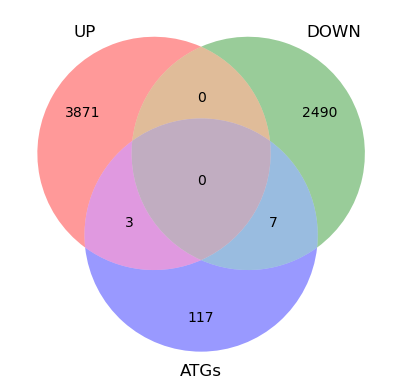

In [44]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(ATG_geneset)

venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'ATGs'), subset_label_formatter=None)
plt.savefig('./HDAC_ATG_DEG_venn.svg')
plt.show()

### 2. Oxidative stress genes

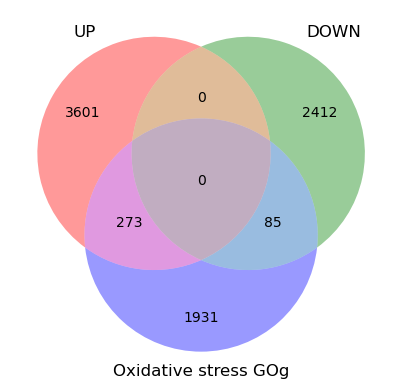

In [45]:
from matplotlib_venn import venn3, venn3_unweighted

set1 = set(UP_geneset)
set2 = set(DOWN_geneset)
set3 = set(os_geneset)

venn3_unweighted([set1, set2, set3], ('UP', 'DOWN', 'Oxidative stress GOg'), subset_label_formatter=None)
plt.savefig('./HDAC_OS_DEG_venn.svg')
plt.show()

TOTAL RESULT miRNA with |log2FoldChange|>1 (all rejected)

In [48]:
ann_DeSeq_LFS = pd.merge(annotated_gtf, DEGs_HTSeq_LFS, on='gene_id', how='inner')

In [50]:
set(list(ann_DeSeq_LFS['gene_biotype']))

{'SRP_RNA', 'protein_coding', 'snRNA', 'snoRNA'}

no miRNA are present

#### Checking common genes with Nv analysis

In [51]:
UP_geneset_Nv = set(df_up['gene_id'].values.tolist())
DOWN_geneset_Nv = set( df_down['gene_id'].values.tolist())

df_up= up_htseq_LFS
df_down=down_htseq_LFS

In [52]:
UP_Nv_ATG = set(set(UP_geneset_Nv) & set(ATG_geneset))
DOWN_Nv_ATG = set(set(DOWN_geneset_Nv) & set(ATG_geneset))

UP_Nv_ros = set(set(UP_geneset_Nv) & set(os_geneset))
DOWN_Nv_ros = set(set(DOWN_geneset_Nv) & set(os_geneset))

l1= set( UP_Nv_ATG ^ set( set(UP_geneset) & set(ATG_geneset) ) )
l2= set( DOWN_Nv_ATG ^ set( set(DOWN_geneset) & set(ATG_geneset) ) ) 
l3= set( UP_Nv_ros ^ set( set(UP_geneset) & set(os_geneset) ) )
l4 =set( DOWN_Nv_ros ^ set( set(DOWN_geneset) & set(os_geneset)) )
print('Common genes number : ', len( set( set( df_up['gene_id'] ) & set( DEGs_HTSeq_LFS['gene_id'] ) ) ) )
print('Common ATG UPregulated number not present in Nv : ', len( l1 ), l1 )
print('Common ATG DOWNregulated number : ', len(l2) , l2 )
print('Common ROS UPregulated number not present in Nv: ',len( l3 ) , l3)
print('Common ATG DOWNregulated number : ', len( l4 ) , l4)

Common genes number :  3874
Common ATG UPregulated number not present in Nv :  1 {'GSBRNA2T00048616001'}
Common ATG DOWNregulated number :  1 {'GSBRNA2T00021530001'}
Common ROS UPregulated number not present in Nv:  25 {'GSBRNA2T00130197001', 'GSBRNA2T00004973001', 'GSBRNA2T00045881001', 'GSBRNA2T00069954001', 'GSBRNA2T00016360001', 'GSBRNA2T00149672001', 'GSBRNA2T00008252001', 'GSBRNA2T00003279001', 'GSBRNA2T00151029001', 'GSBRNA2T00018739001', 'GSBRNA2T00053968001', 'GSBRNA2T00043000001', 'GSBRNA2T00038341001', 'GSBRNA2T00131177001', 'GSBRNA2T00059297001', 'GSBRNA2T00043262001', 'GSBRNA2T00041561001', 'GSBRNA2T00016842001', 'GSBRNA2T00015332001', 'GSBRNA2T00000627001', 'GSBRNA2T00036968001', 'GSBRNA2T00132122001', 'GSBRNA2T00055987001', 'GSBRNA2T00037324001', 'GSBRNA2T00098200001'}
Common ATG DOWNregulated number :  21 {'GSBRNA2T00005629001', 'GSBRNA2T00082200001', 'GSBRNA2T00035584001', 'GSBRNA2T00037127001', 'GSBRNA2T00003644001', 'GSBRNA2T00100296001', 'GSBRNA2T00154521001', 'GSBR

---

## Merging and analyzing expression levels

loading expression data

In [54]:
DEGs_NCounts = pd.read_csv('/home/famgarcia/TFM/data/Testillano col/Report Novogene RNAseq Deacetilation Inhibition treatment vs Control/ANALYSIS NATALIA/counts/DE_results/Condition_T_vs_C_normcounts.csv')
DEGs_NCounts.rename(columns={'external_gene_name':'gene_name', 'Unnamed: 0':'gene_id'}, inplace=True)


In [58]:
DEGs_NCounts.head()

,gene_id,ensembl_gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,description,transcript_length,sig
0,1,ENSRNA049434328,5.754965,4.274690,1.358848,3.145819,1.656222e-03,3.171013e-03,tRNA-Ala for anticodon CGC,73,yes
1,11,ENSRNA049444545,17.743753,8.435966,1.447757,5.826922,5.645904e-09,1.958701e-08,tRNA-Leu for anticodon AAG,81,yes
2,18,ENSRNA049445564,39.255182,0.899179,0.401881,2.237426,2.525854e-02,3.955385e-02,Eukaryotic small subunit ribosomal RNA,945,yes
3,19,ENSRNA049445587,3.900645,6.269266,1.836784,3.413176,6.421049e-04,1.308855e-03,Eukaryotic large subunit ribosomal RNA,336,yes
4,24,ENSRNA049445844,209.370786,3.362536,0.244411,13.757715,4.577650e-43,9.481695e-42,Eukaryotic small subunit ribosomal RNA,677,yes


In [82]:
df_up=pd.merge(DEGs_NCounts, up_htseq_LFS, on='gene_id', how='inner').merge(annotated_gtf, on='gene_id', how='inner')
df_down=pd.merge(DEGs_NCounts, down_htseq_LFS, on='gene_id', how='inner').merge(annotated_gtf, on='gene_id', how='inner')

### 1. ATG genes

merging ATG genes with DEG results.

In [71]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_ATG['gene_id']

reading up and down regulated genes and merging them with ATG genes in _Brassica napus_ reported in literature, preserving the sorted log2FoldChange order

In [83]:
df_ATG_up = df_up.merge(df_tomerge, how='inner')
#df_ATG_up = df_ATG_up.sort_values('log2FoldChange', ascending=False)

In [84]:
df_ATG_down = df_down.merge(df_tomerge, how='inner')
#df_ATG_down = df_ATG_down.sort_values('log2FoldChange')

Adding type of fold change

In [85]:
df_ATG_up['signal']=['+' for i in range(df_ATG_up.shape[0])]
df_ATG_down['signal']=['-' for i in range(df_ATG_down.shape[0])]

merging both dataframes

In [86]:
#ATG_DEG = pd.merge(df_tomerge, df_all, how='inner')
ATG_DEG = pd.concat((df_ATG_up, df_ATG_down), axis=0)

In [87]:
ATG_DEG.columns

Index(['gene_id', 'Crep1', 'Crep2', 'Crep3', 'Trep1', 'Trep2', 'Trep3',
       'baseMean', 'log2FoldChange', 'lfcSE', 'pvalue', 'padj', 'gene_name',
       'gene_source', 'gene_biotype', 'signal'],
      dtype='object')

making a colordict mapping treatments across samples

In [88]:
lut = dict(zip(["C", "T"], ['b','r']))
lut


{'C': 'b', 'T': 'r'}

In [89]:
sample_order = [ "T", "T", "T","C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [90]:
lut_s = dict(zip(["+", "-"], ['r','g']))
lut_s

{'+': 'r', '-': 'g'}

In [91]:
row_signal = ATG_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 800x800 with 0 Axes>

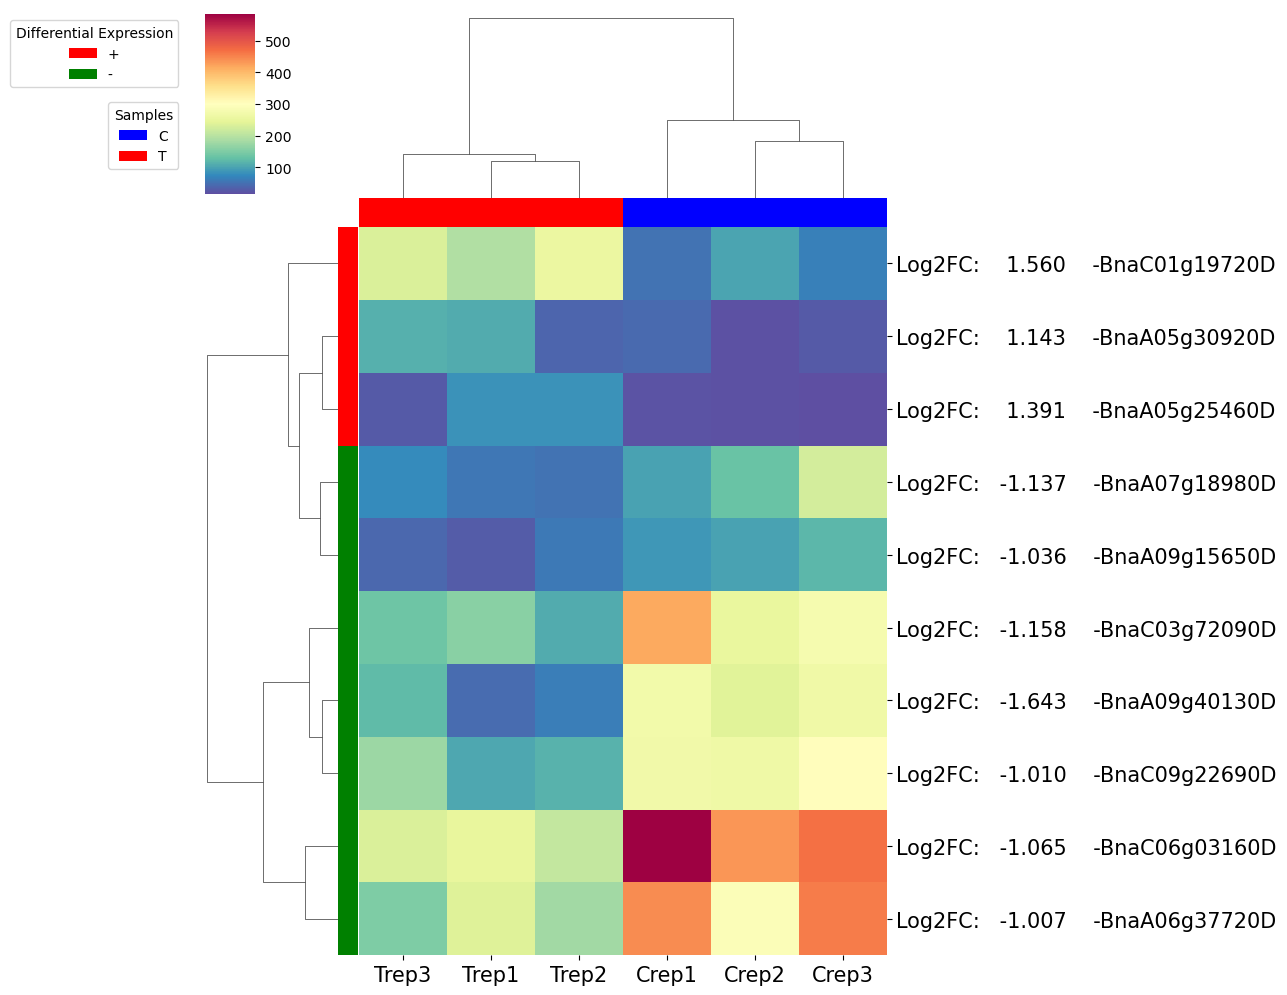

In [92]:
ATG_DEG = pd.concat((df_ATG_up, df_ATG_down), axis=0)

list_formatted_index = []
for i in ATG_DEG['log2FoldChange']:
    if i<0:
        list_formatted_index.append('Log2FC:   ' + "%.3f" % round(i, 3) + '    ')
    elif i>0:
        list_formatted_index.append('Log2FC:    ' + "%.3f" % round(i, 3) + '    ')

ATG_DEG['NFC']=list_formatted_index

fig = plt.figure( figsize=(8, 8))

# Specifying gene name in the ATG dataframe index
ATG_DEG.set_index(['NFC','gene_name'], inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cg = sns.clustermap(ATG_DEG[[ 'Trep1', 'Trep2', 'Trep3','Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r', 
               method='complete',
               col_colors=col_colors, 
               row_colors=row_colors, 
                
               yticklabels=True)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=15)

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(-0.4, 0.1), loc='lower right')
plt.legend(handles_signal, lut_s, title='Differential Expression',
           bbox_to_anchor=(0, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('/home/famgarcia/TFM/data/Testillano col/Report Novogene RNAseq Deacetilation Inhibition treatment vs Control/ANALYSIS NATALIA/ATG_DEG_HDAC.png', bbox_inches='tight')
plt.show()


den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
                                         labels = df.index,
                                         color_threshold=0.60)  
from collections import defaultdict

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

cluster = []
for i in df.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

df["cluster"] = cluster


### 2. ROS genes

merging OS genes with DEG results.

In [93]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_os['gene_id']

reading up and down regulated genes and merging them with ATG genes in _Brassica napus_ reported in literature, preserving the sorted log2FoldChange order

In [94]:
df_OS_up = df_up.merge(df_tomerge, how='inner')

In [95]:
df_OS_down = df_down.merge(df_tomerge, how='inner')

Adding type of fold change

In [96]:
df_OS_up['signal']=['+' for i in range(df_OS_up.shape[0])]
df_OS_down['signal']=['-' for i in range(df_OS_down.shape[0])]

merging both dataframes

In [97]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

making a colordict mapping treatments across samples

In [98]:
lut = dict(zip(["T", "C"], ['r','b']))
lut


{'T': 'r', 'C': 'b'}

In [99]:
sample_order = ["T", "T", "T", "C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [100]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [101]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

OS_DEG['log2FoldChange'].describe()

count    358.000000
mean       0.910257
std        2.571358
min       -9.617401
25%        1.014813
50%        1.453284
75%        2.107958
max        9.107323
Name: log2FoldChange, dtype: float64

<Figure size 1000x10000 with 0 Axes>

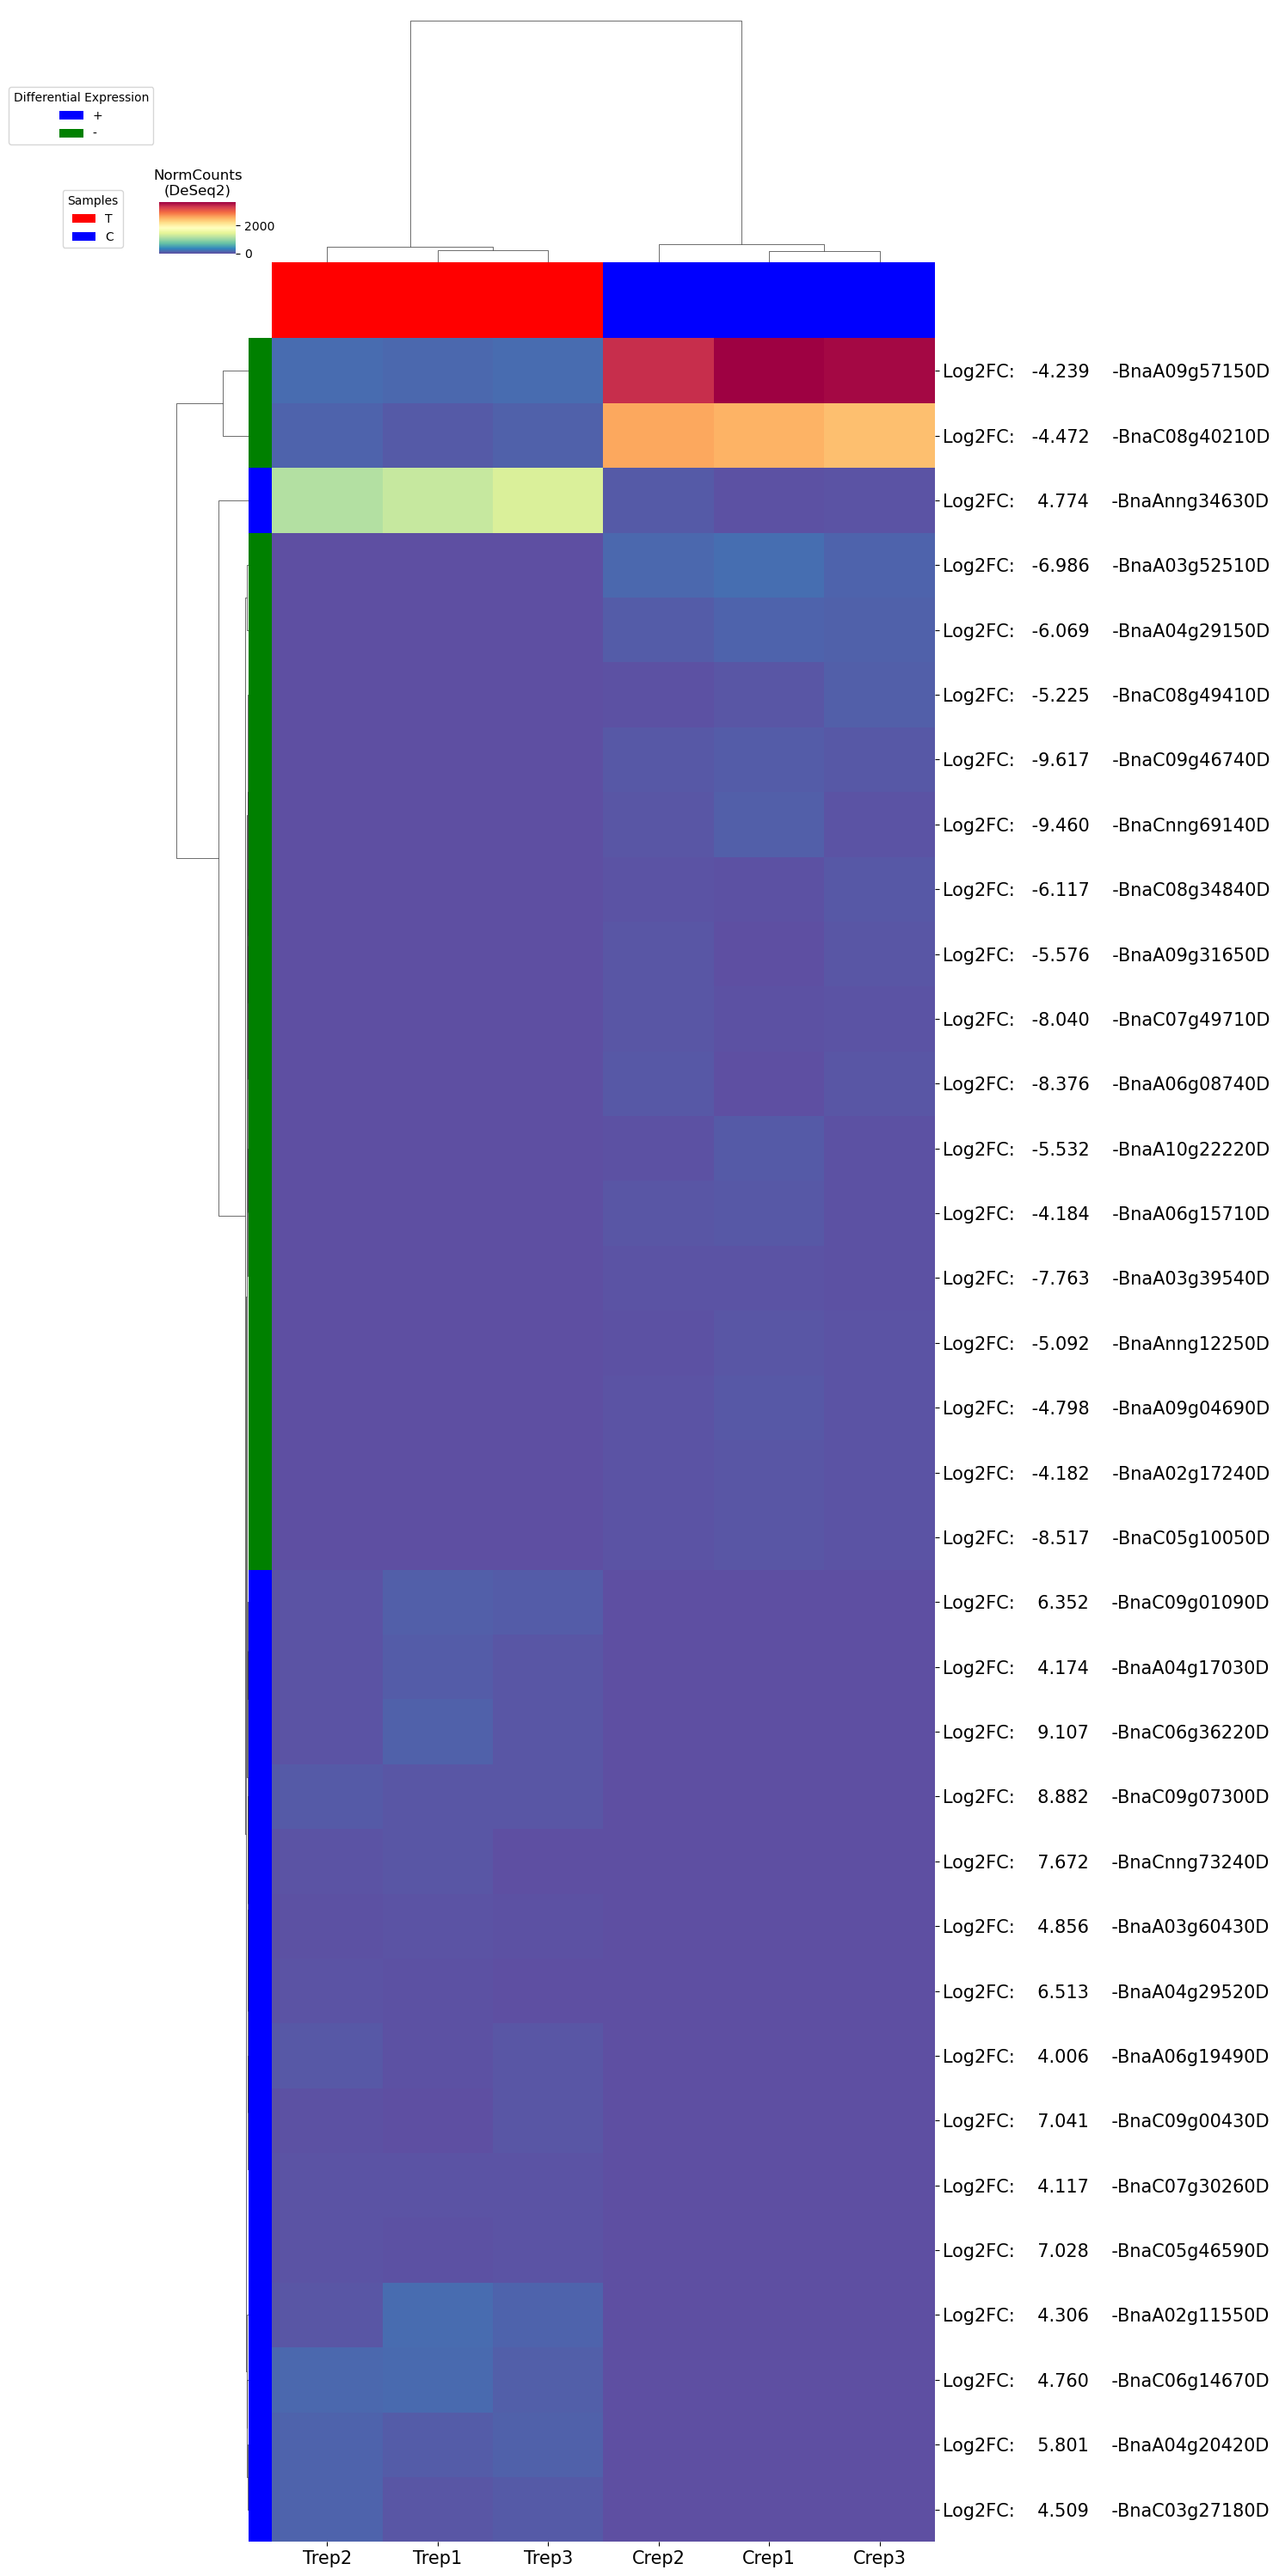

In [102]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

OS_DEG = OS_DEG[abs(OS_DEG['log2FoldChange'])>=4]

list_formatted_index = []
for i in OS_DEG['log2FoldChange']:
    if i<0:
        list_formatted_index.append('Log2FC:   ' + "%.3f" % round(i, 3) + '    ')
    elif i>0:
        list_formatted_index.append('Log2FC:    ' + "%.3f" % round(i, 3) + '    ')

OS_DEG['NFC']=list_formatted_index

plt.figure(figsize=(10,100))

# Specifying gene name in the ROS dataframe index
OS_DEG.set_index(['NFC','gene_name'], inplace=True)

row_signal = OS_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cg = sns.clustermap(OS_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors,
              figsize=(12,30),dendrogram_ratio=0.1,
               yticklabels=True)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

ax = cg.ax_heatmap
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=15)
cg.ax_cbar.set_position([0, 0.9, cg.ax_row_dendrogram.get_position().width, 0.02])
cg.ax_cbar.set_title('NormCounts\n(DeSeq2)')

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(-0.4, 0.0), loc='lower right')
plt.legend(handles_signal, lut_s, title='Differential Expression',
           bbox_to_anchor=(0, 0.94), bbox_transform=plt.gcf().transFigure, loc='lower right')


plt.gca().add_artist(legend1)
plt.savefig('/home/famgarcia/TFM/data/Testillano col/Report Novogene RNAseq Deacetilation Inhibition treatment vs Control/ANALYSIS NATALIA/ROS_4LFC_DEG_HDAC_shrunk.png', bbox_inches='tight')
plt.show()


All up regulated

In [250]:
max_val = max(OS_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']].max().tolist())

<Figure size 1000x10000 with 0 Axes>

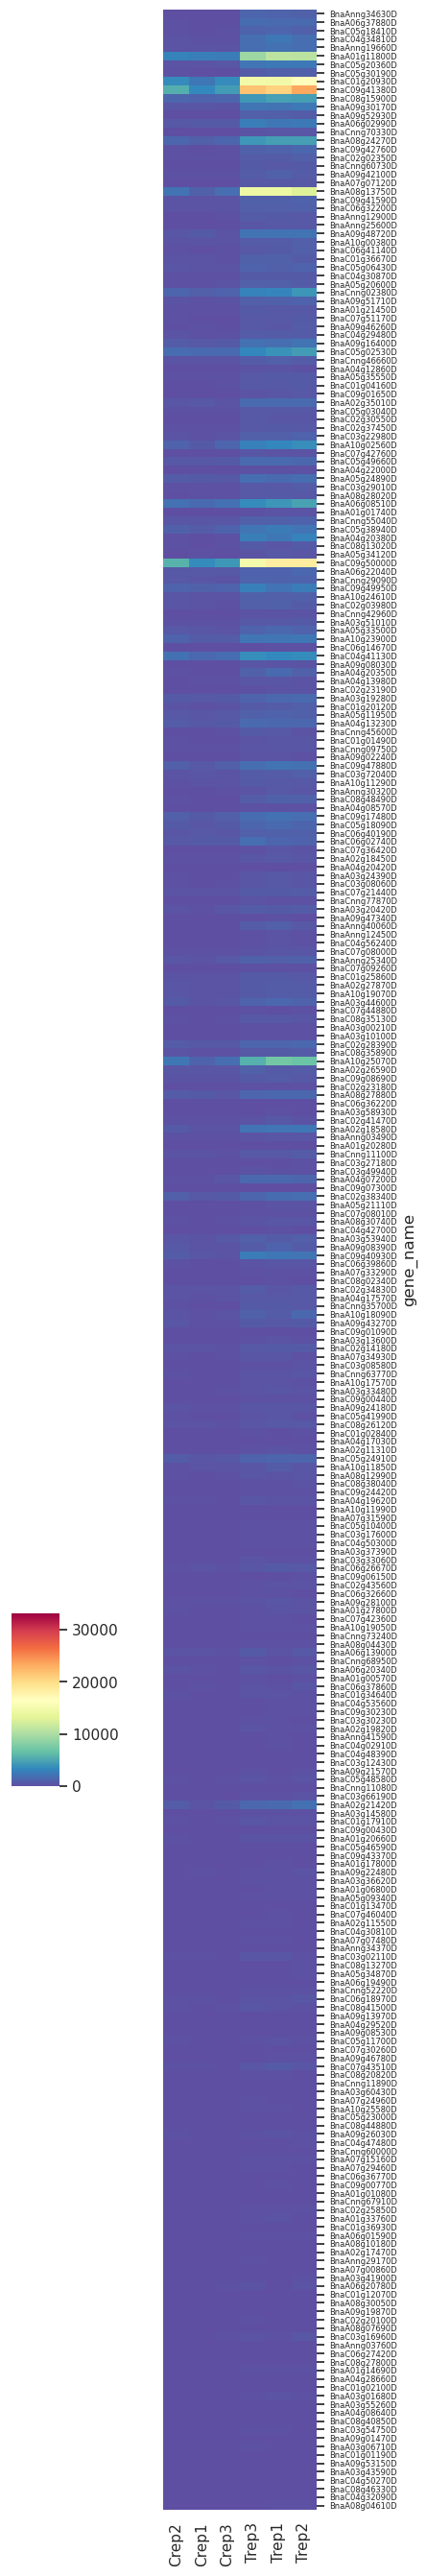

In [251]:
df_OS_up = df_up.merge(df_tomerge, how='inner').sort_values('padj')
plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
df_OS_up.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cm = sns.clustermap(df_OS_up[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r',
               vmax= max_val,
               yticklabels=True,
               row_cluster=False)

# Change proportions of heatmap
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=6)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height*3.5])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])


cm.tick_params(axis='x', rotation=90)# Rotates X-Axis Ticks by 45-degrees

plt.savefig('./analyses-Novogene/OS_DEG_TM_up.png', bbox_inches='tight')
plt.show()

<Figure size 1000x10000 with 0 Axes>

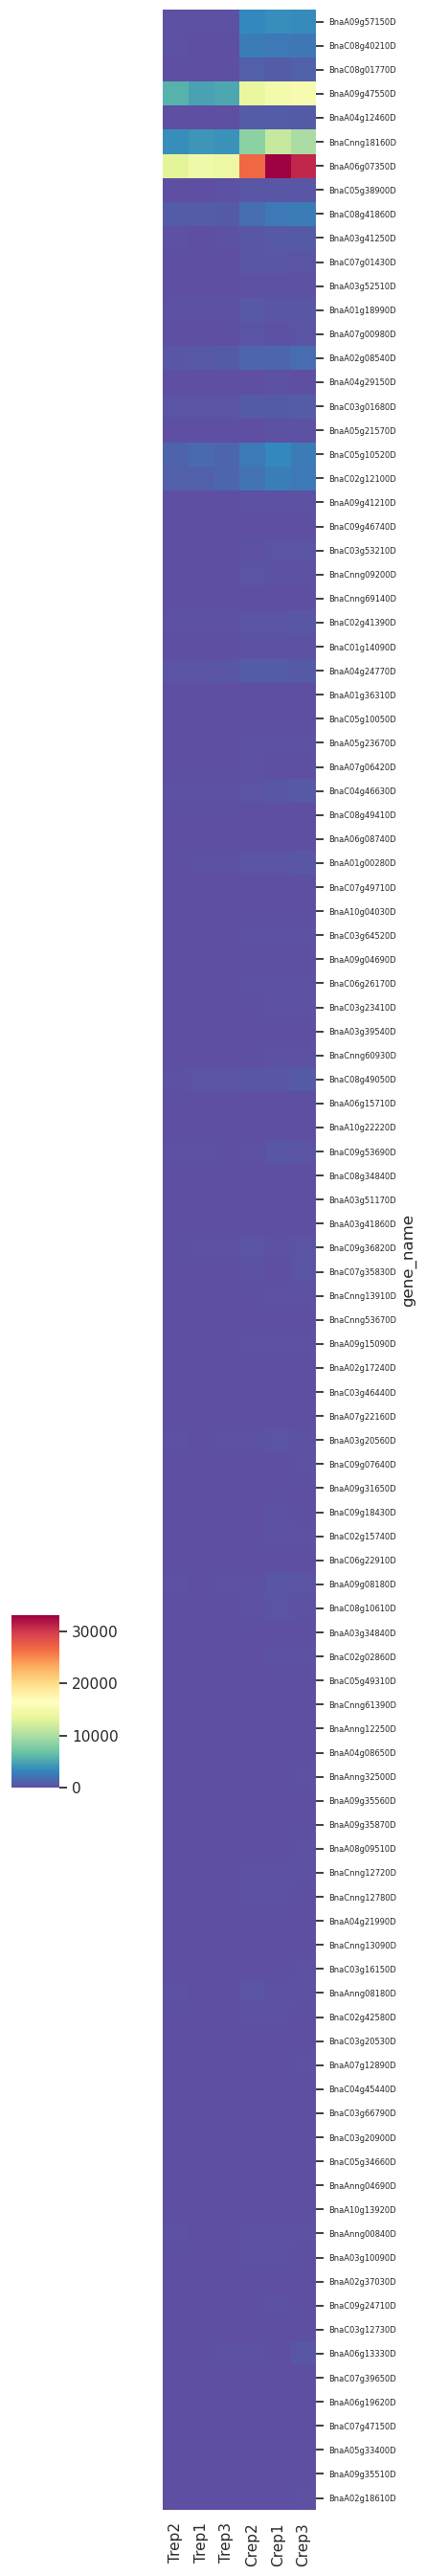

In [252]:
df_OS_down = df_down.merge(df_tomerge, how='inner').sort_values('padj')
plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
df_OS_down.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cm = sns.clustermap(df_OS_down[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r',
               vmax=max_val,
               yticklabels=True,
               row_cluster=False)

# Change proportions of heatmap
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=6)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height*3.5])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])


cm.tick_params(axis='x', rotation=90)# Rotates X-Axis Ticks by 45-degrees

plt.savefig('./analyses-Novogene/OS_DEG_TM_down.png', bbox_inches='tight')
plt.show()

In [43]:
import re
UPREGULATED = df_ATG_up['gene_name'].tolist()
list_to_check = ['BnATG5', 'NBR1', 'CIB-123', 'CIB']
for i in UPREGULATED:
    for k in list_to_check:
        if re.search(k,i):
            print('found match for %s', i)

In [253]:
df_OS_down = pd.merge(df_tomerge, df_down, how='inner')

columnsdisplayed = ['gene_name', 'gene_description','Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3', 'T', 'C', 'log2FoldChange', 'pvalue', 'padj', 'gene_chr']
df_OS_down[columnsdisplayed][df_OS_down['gene_description']!='-']

,gene_name,gene_description,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,T,C,log2FoldChange,pvalue,padj,gene_chr
0,BnaA05g33400D,BnaA05g33400D protein [Source:UniProtKB/TrEMBL...,0.000000,0.000000,2.616933,33.367527,15.195933,11.015779,0.872311,19.859746,-4.503335,9.432663e-03,4.664462e-02,LK033004
1,BnaCnng69140D,BnaCnng69140D protein [Source:UniProtKB/TrEMBL...,0.000000,0.000000,0.000000,109.487197,56.442036,37.453647,0.000000,67.794293,-8.709783,3.813485e-10,1.237120e-08,LK042784
2,BnaA04g21990D,Peroxidase [Source:UniProtKB/TrEMBL;Acc:A0A078...,0.000000,1.538521,9.595421,45.880349,11.939661,79.313605,3.711314,45.711205,-3.612378,1.206258e-03,8.754138e-03,LK032085
3,BnaA09g08180D,BnaA09g08180D protein [Source:UniProtKB/TrEMBL...,103.801707,191.545824,152.654430,406.666732,181.265769,365.723847,149.333987,317.885449,-1.086809,4.254379e-04,3.635099e-03,LK032087
4,BnaAnng12250D,Flavin-containing monooxygenase [Source:UniPro...,0.000000,0.000000,1.744622,32.324792,11.939661,37.453647,0.581541,27.239367,-5.542671,6.259225e-04,5.051548e-03,LK033174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,BnaCnng18160D,BnaCnng18160D protein [Source:UniProtKB/TrEMBL...,4041.142934,3699.372968,3881.784082,11397.095846,8429.400973,9892.169106,3874.099995,9906.221975,-1.354645,1.528513e-31,3.295465e-29,LK032859
61,BnaC09g36820D,Homoserine dehydrogenase [Source:UniProtKB/TrE...,135.349285,90.003460,130.846654,210.632512,293.064417,286.410241,118.733133,263.369057,-1.152477,1.577536e-05,2.100044e-04,LK032065
62,BnaAnng32500D,BnaAnng32500D protein [Source:UniProtKB/TrEMBL...,44.777207,75.387513,48.849418,122.000020,124.823733,153.119321,56.338046,133.314358,-1.236982,7.686613e-04,5.993797e-03,LK041075
77,BnaA06g15710D,BnaA06g15710D protein [Source:UniProtKB/TrEMBL...,3.052991,0.000000,2.616933,66.735053,47.758646,27.539446,1.889975,47.344382,-4.698088,7.366022e-06,1.061971e-04,LK031983


In [256]:
df_OS_up['log2FoldChange'].describe()

count    296.000000
mean       2.288711
std        1.439335
min        1.003067
25%        1.352970
50%        1.825775
75%        2.604870
max        8.445700
Name: log2FoldChange, dtype: float64

In [290]:
df_OS_up_new= df_OS_up[df_OS_up['log2FoldChange']>2.6]

In [293]:
df_OS_up_new = df_OS_up_new.reset_index()

In [258]:
df_OS_down['log2FoldChange'].describe()

count    104.000000
mean      -3.088263
std        2.099770
min       -8.819099
25%       -4.353485
50%       -2.324561
75%       -1.387178
max       -1.018496
Name: log2FoldChange, dtype: float64

In [294]:
df_OS_down_new= df_OS_down[df_OS_down['log2FoldChange']<4.35]

making a colordict mapping treatments across samples

In [259]:
lut = dict(zip(["T", "C"], "rbg"))
lut


{'T': 'r', 'C': 'b'}

In [260]:
sample_order = ["T", "T", "T", "C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [261]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [296]:
df_OS_up_new['signal']=['+' for i in range(df_OS_up_new.shape[0])]
df_OS_down_new['signal']=['-' for i in range(df_OS_down_new.shape[0])]

In [297]:
OS_DEG = pd.concat((df_OS_up_new, df_OS_down_new), axis=0)

In [283]:
row_signal = OS_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 1000x10000 with 0 Axes>

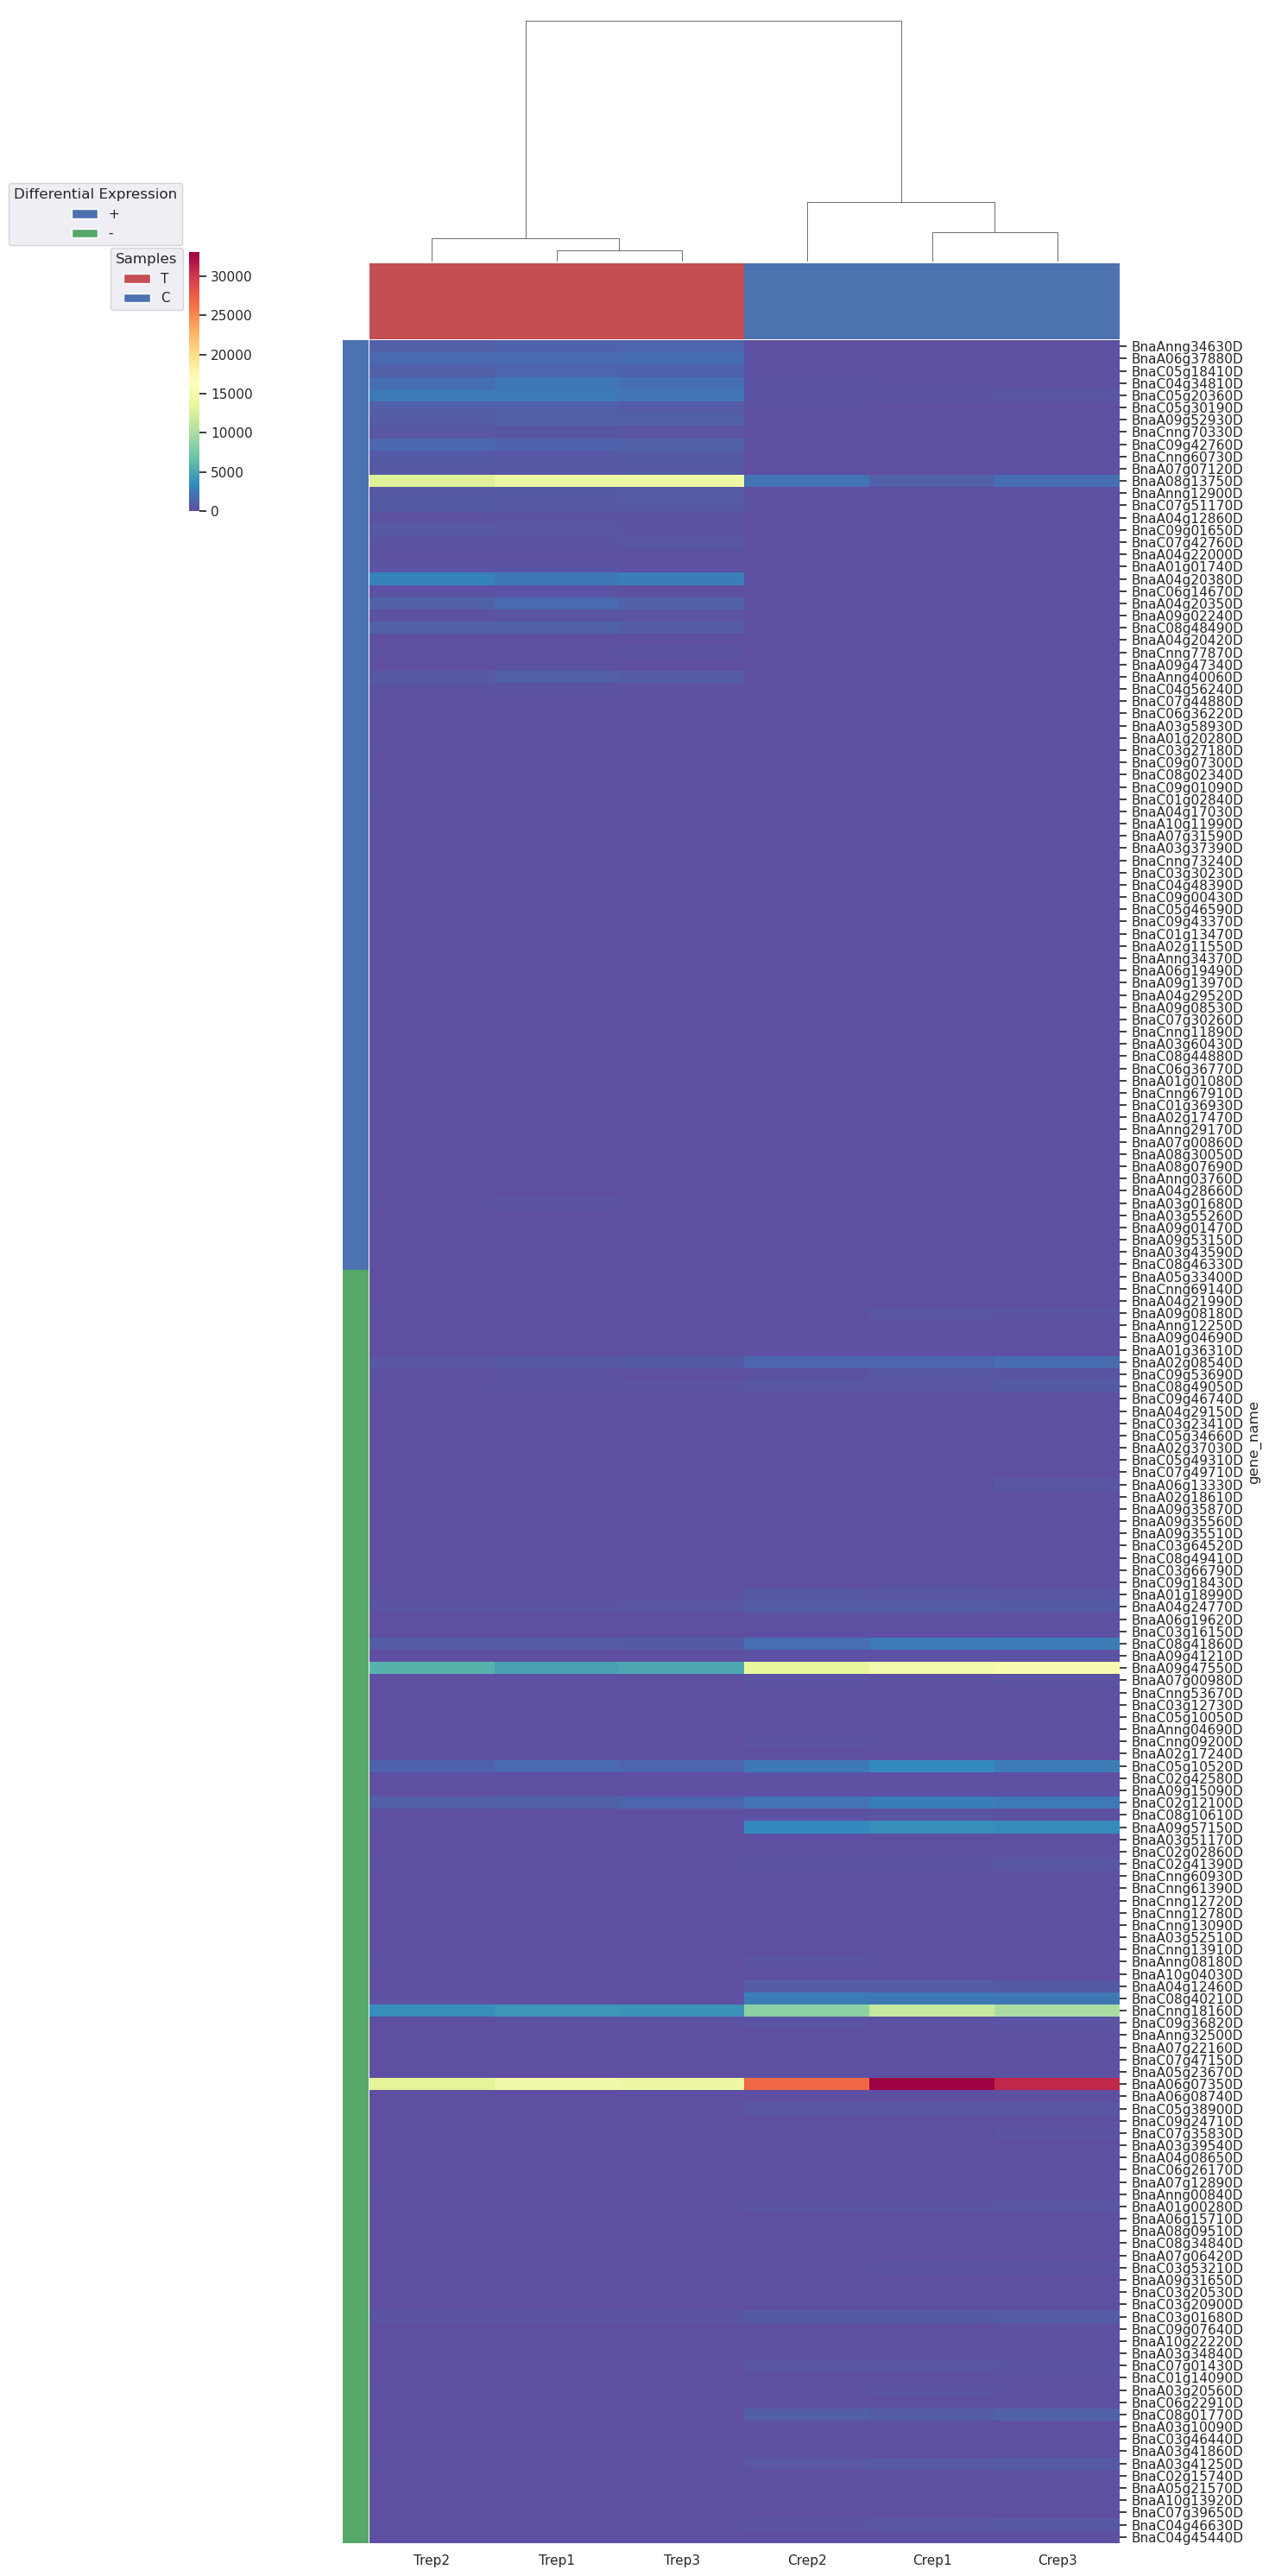

In [299]:
OS_DEG = pd.concat((df_OS_up_new, df_OS_down_new), axis=0)

plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
OS_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(OS_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors, 
               cbar_pos=(-0.05,0.8,0.01,0.1),
               figsize=(12,30),dendrogram_ratio=0.1,
               yticklabels=True,
               row_cluster=False)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(0.05, 0.75), loc='lower right')

plt.legend(handles_signal, lut_s, title='Differential Expression', bbox_to_anchor=(-0.05, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./analyses-Novogene/OS_DEG_TM_75quantlog2FC.png', bbox_inches='tight')
plt.show()


### 3. novel genes (?)

In [32]:
df_novel_hypothetical = df_all[df_all['gene_biotype'] == '-']

In [33]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_novel_hypothetical['gene_id']

reading up and down regulated genes

In [34]:
df_ATG_up = pd.merge(df_tomerge, df_up, how='inner')
df_ATG_down = pd.merge(df_tomerge, df_down, how='inner')

Adding type of fold change

In [35]:
df_ATG_up['signal']=['+' for i in range(df_ATG_up.shape[0])]
df_ATG_down['signal']=['-' for i in range(df_ATG_down.shape[0])]

merging both dataframes

In [46]:
#ATG_DEG = pd.merge(df_tomerge, df_all, how='inner')
ATG_DEG = pd.concat((df_ATG_up, df_ATG_down), axis=0)

#discretizar? no. volver a hacer protocolo con anotaciones nuevas :-( (?)

In [48]:
ATG_DEG.describe()

,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,T,C,log2FoldChange,pvalue,...,Trep3_count,Crep1_count,Crep2_count,Crep3_count,Trep1_fpkm,Trep2_fpkm,Trep3_fpkm,Crep1_fpkm,Crep2_fpkm,Crep3_fpkm
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,9.100000e+02,...,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,212.224279,198.759119,235.829766,148.213924,138.809001,147.517011,215.604388,144.846646,2.210124,1.960033e-03,...,270.350549,142.139560,127.884615,133.914286,8.933149,8.247185,10.098400,5.306778,5.053752,5.296838
std,1042.652096,959.217425,1290.019392,773.894654,671.331130,762.273744,1090.586752,733.841669,3.764128,2.792092e-03,...,1478.852552,742.177541,618.496803,691.983542,50.874642,44.491441,65.205671,31.463587,28.055337,31.286672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.420552,8.755731e-194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.370940,19.231508,18.318532,0.000000,0.000000,0.000000,21.552088,0.000000,-1.159669,6.373013e-06,...,21.000000,0.000000,0.000000,0.000000,1.026859,0.931289,0.973396,0.000000,0.000000,0.000000
50%,50.883190,44.617100,50.594040,21.897439,20.623052,20.929979,50.671690,23.023239,2.109950,3.515422e-04,...,58.000000,21.000000,19.000000,19.000000,2.204237,2.026199,1.986927,0.734311,0.789642,0.738779
75%,130.006550,116.735256,130.846654,86.547022,82.492206,81.241367,126.590382,80.262576,6.096571,3.198885e-03,...,150.000000,83.000000,76.000000,73.750000,4.405566,3.912909,4.292683,2.709858,2.664086,2.828891
max,17067.239525,16960.651945,21476.297549,17459.558358,13939.012014,17117.418234,17646.240760,16171.996202,9.726975,1.029176e-02,...,24620.000000,16744.000000,12842.000000,15539.000000,930.088280,717.586221,1245.868418,703.078696,561.309868,689.301061


making a colordict mapping treatments across samples

In [37]:
lut = dict(zip(["T", "C"], "rbg"))
lut


{'T': 'r', 'C': 'b'}

In [38]:
sample_order = ["T", "T", "T", "C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [39]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [40]:
row_signal = ATG_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 640x480 with 0 Axes>

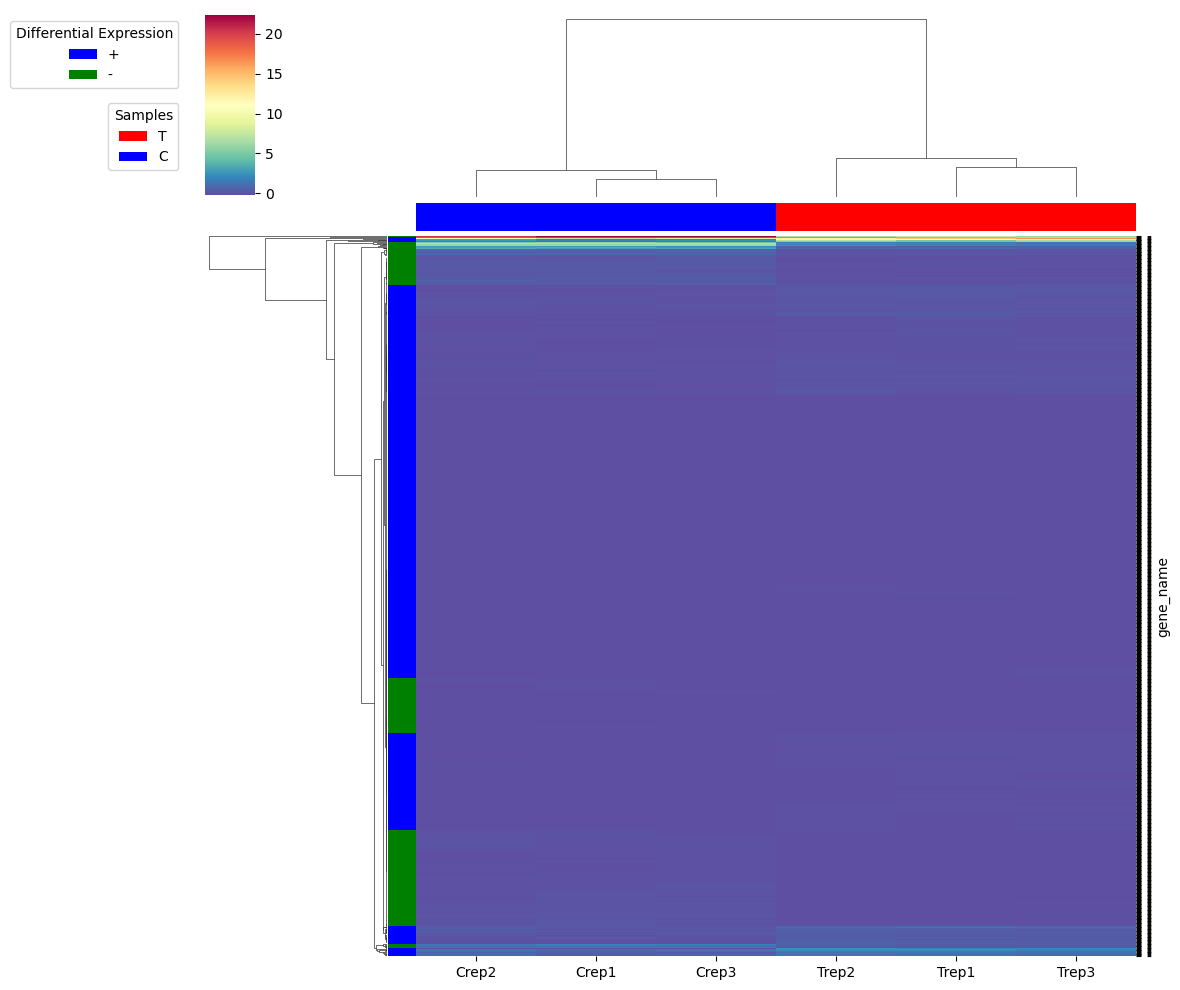

In [47]:
plt.figure()

# Specifying gene name in the ATG dataframe index
ATG_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(ATG_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], cmap='Spectral_r', col_colors=col_colors, row_colors=row_colors, yticklabels=True)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(-0.4, 0.1), loc='lower right')
plt.legend(handles_signal, lut_s, title='Differential Expression',
           bbox_to_anchor=(0, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./novel_DEG_TM.svg')
plt.show()


# NATALIA HtSeq Analysis

In [83]:
Normcounts_HTSeq = pd.read_csv('~/TFM/renv/Condition_EE_vs_WT_normcounts.csv')

In [91]:
Normcounts_HTSeq = Normcounts_HTSeq.rename(columns={Normcounts_HTSeq.columns[0]:'gene_id'})
Normcounts_HTSeq = pd.merge(Normcounts_HTSeq, annotated_gtf, how='left', on='gene_id')
Normcounts_HTSeq.head()

,gene_id,Crep1,Crep2,Crep3,Trep1,Trep2,Trep3,gene_name,gene_source,gene_biotype
0,GSBRNA2T00156847001,492793.833798,463116.330053,484101.940838,347765.450886,318833.193132,361554.531049,BnaC04g21470D,ena,protein_coding
1,GSBRNA2T00049471001,432409.599807,431564.975624,452516.870670,300191.367185,277560.733854,336666.467861,BnaA09g39720D,ena,protein_coding
2,GSBRNA2T00096582001,352041.449362,339103.766630,361714.195425,236584.935529,215858.757529,278725.566183,BnaCnng66900D,ena,protein_coding
3,GSBRNA2T00025657001,251385.080025,224985.552174,246013.409022,157346.786219,141687.046216,164700.831743,BnaCnng76410D,ena,protein_coding
4,GSBRNA2T00144552001,293336.089453,302295.836471,316729.898689,229455.143350,214362.112174,204639.678251,BnaA06g31290D,ena,protein_coding


In [92]:
df_up = pd.merge(up_htseq, Normcounts_HTSeq, how='inner', on='gene_id')
df_down = pd.merge(down_htseq, Normcounts_HTSeq, how='inner', on='gene_id')

### 1. ATG genes

merging ATG genes with DEG results.

In [93]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_ATG['gene_id']

reading up and down regulated genes and merging them with ATG genes in _Brassica napus_ reported in literature, preserving the sorted log2FoldChange order

In [94]:
df_ATG_up = df_up.merge(df_tomerge, how='inner')
#df_ATG_up = df_ATG_up.sort_values('log2FoldChange', ascending=False)

In [95]:
df_ATG_down = df_down.merge(df_tomerge, how='inner')
#df_ATG_down = df_ATG_down.sort_values('log2FoldChange')

Adding type of fold change

In [96]:
df_ATG_up['signal']=['+' for i in range(df_ATG_up.shape[0])]
df_ATG_down['signal']=['-' for i in range(df_ATG_down.shape[0])]

merging both dataframes

In [97]:
#ATG_DEG = pd.merge(df_tomerge, df_all, how='inner')
ATG_DEG = pd.concat((df_ATG_up, df_ATG_down), axis=0)

In [58]:
ATG_DEG.columns

Index(['gene_id', 'Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3', 'T',
       'C', 'log2FoldChange', 'pvalue', 'padj', 'gene_name', 'gene_chr',
       'gene_start', 'gene_end', 'gene_strand', 'gene_length', 'gene_biotype',
       'gene_description', 'tf_family', 'Trep1_count', 'Trep2_count',
       'Trep3_count', 'Crep1_count', 'Crep2_count', 'Crep3_count',
       'Trep1_fpkm', 'Trep2_fpkm', 'Trep3_fpkm', 'Crep1_fpkm', 'Crep2_fpkm',
       'Crep3_fpkm', 'signal'],
      dtype='object')

making a colordict mapping treatments across samples

In [79]:
lut = dict(zip(["T", "C"], "rbg"))
lut


{'T': 'r', 'C': 'b'}

In [80]:
sample_order = ["T", "T", "T", "C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [81]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [82]:
row_signal = ATG_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 640x480 with 0 Axes>

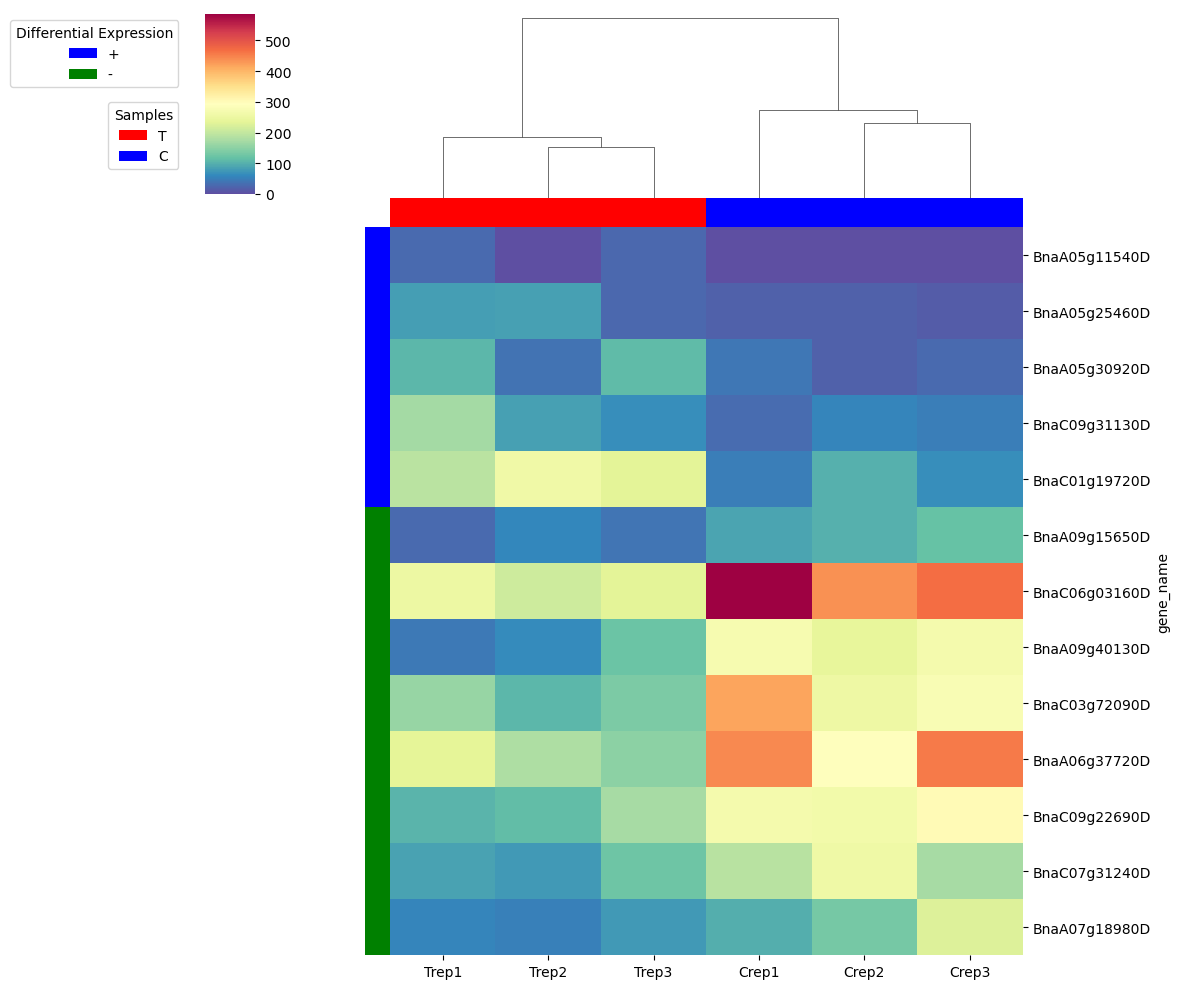

In [99]:
ATG_DEG = pd.concat((df_ATG_up, df_ATG_down), axis=0)

plt.figure()

# Specifying gene name in the ATG dataframe index
ATG_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(ATG_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors, 
               yticklabels=True,
               row_cluster=False)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(-0.4, 0.1), loc='lower right')
plt.legend(handles_signal, lut_s, title='Differential Expression',
           bbox_to_anchor=(0, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./analyses-Nv-Sara/HDAC_ATG_DEG_TM.png', bbox_inches='tight')
plt.show()


In [103]:
columnsdisplayed = ['gene_name','Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3', 'log2FoldChange', 'pvalue', 'padj']
df_ATG_up[columnsdisplayed]

,gene_name,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,log2FoldChange,pvalue,padj
0,BnaA05g11540D,27.524219,0.000000,27.245214,0.000000,0.000000,0.000000,6.527668,4.740850e-03,0.025533
1,BnaA05g25460D,81.553242,82.377085,25.487458,19.800501,18.390983,14.304833,1.850388,4.940886e-03,0.026381
2,BnaA05g30920D,106.019215,36.954206,110.738610,42.727398,18.390983,27.509293,1.513594,7.835027e-03,0.038176
3,BnaC09g31130D,171.261808,83.146964,64.158084,30.221818,56.254772,49.516728,1.225854,1.088135e-02,0.049574
4,BnaC01g19720D,190.630703,257.139685,232.902632,50.022319,100.609496,64.921932,1.660952,1.841931e-07,0.000003


In [104]:
df_ATG_down[columnsdisplayed]

,gene_name,Trep1,Trep2,Trep3,Crep1,Crep2,Crep3,log2FoldChange,pvalue,padj
0,BnaA09g15650D,29.563050,57.740947,39.549504,87.539058,98.445851,118.840147,-1.257894,3.683461e-03,2.078040e-02
1,BnaC06g03160D,250.776219,210.177048,231.144877,585.677985,435.974484,468.758357,-1.108622,8.736880e-09,2.079364e-07
2,BnaA09g40130D,43.834868,62.360223,123.042900,270.954228,238.000959,266.289959,-1.755057,2.291589e-07,4.239752e-06
3,BnaC03g72090D,159.028822,106.243343,136.226068,417.894790,252.064652,276.193304,-1.240457,3.536180e-06,5.094555e-05
4,BnaA06g37720D,235.484986,179.381876,149.409236,442.905950,289.928441,456.654268,-1.078252,1.014988e-05,1.307015e-04
5,BnaC09g22690D,102.960968,113.942136,173.138938,266.785701,262.882878,302.602226,-1.092220,3.030263e-05,3.428734e-04
6,BnaC07g31240D,85.630904,76.218050,124.800656,188.625828,255.310120,171.657990,-1.103273,3.185207e-04,2.664848e-03
7,BnaA07g18980D,55.048438,50.812034,76.462374,96.918243,131.982350,224.475833,-1.313879,7.917179e-04,5.785098e-03


### 2. ROS genes

merging OS genes with DEG results.

In [105]:
df_tomerge = pd.DataFrame()
df_tomerge['gene_id'] = df_os['gene_id']

reading up and down regulated genes and merging them with ATG genes in _Brassica napus_ reported in literature, preserving the sorted log2FoldChange order

In [106]:
df_OS_up = df_up.merge(df_tomerge, how='inner')

In [107]:
df_OS_down = df_down.merge(df_tomerge, how='inner')

Adding type of fold change

In [108]:
df_OS_up['signal']=['+' for i in range(df_OS_up.shape[0])]
df_OS_down['signal']=['-' for i in range(df_OS_down.shape[0])]

merging both dataframes

In [109]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

making a colordict mapping treatments across samples

In [110]:
lut = dict(zip(["T", "C"], "rbg"))
lut


{'T': 'r', 'C': 'b'}

In [111]:
sample_order = ["T", "T", "T", "C", "C", "C"]
col_colors = [*map(lut.get, sample_order)]

making a colordict mapping type of differential expression (UP:+, DOWN:-) across instances of DEG

In [112]:
lut_s = dict(zip(["+", "-"], ['b','g']))
lut_s

{'+': 'b', '-': 'g'}

In [113]:
row_signal = OS_DEG.signal.tolist()
row_colors = [*map(lut_s.get, row_signal)]

<Figure size 1000x10000 with 0 Axes>

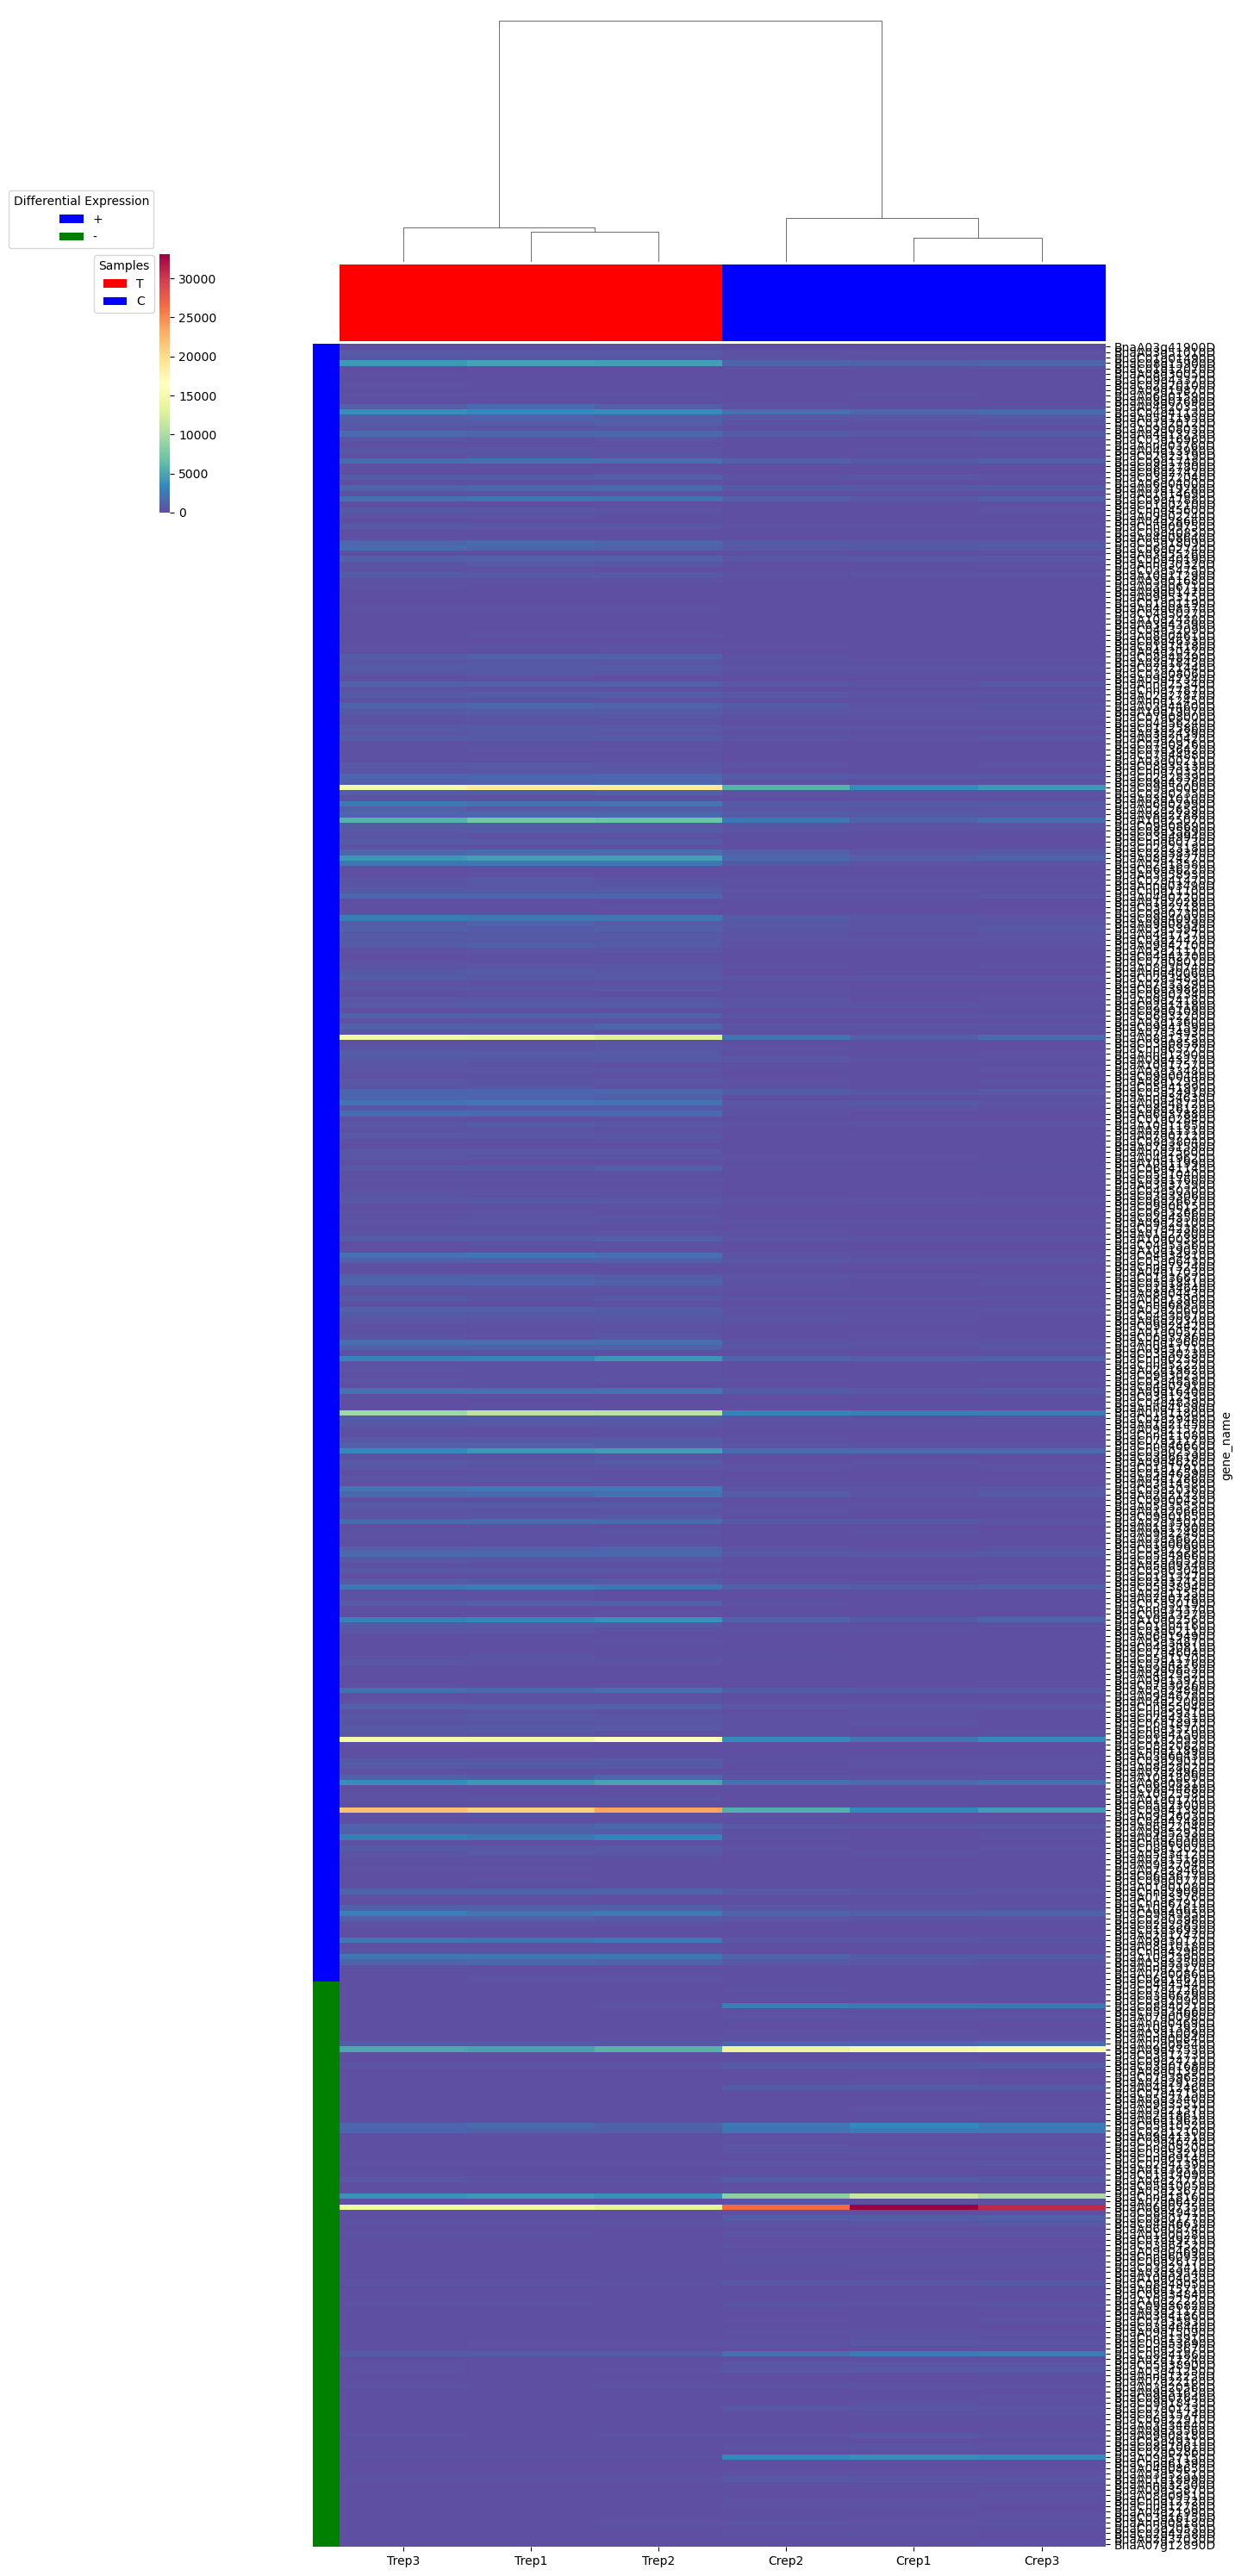

In [115]:
OS_DEG = pd.concat((df_OS_up, df_OS_down), axis=0)

plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
OS_DEG.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
sns.clustermap(OS_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r', 
               col_colors=col_colors, 
               row_colors=row_colors, 
               cbar_pos=(-0.05,0.8,0.01,0.1),
               figsize=(12,30),dendrogram_ratio=0.1,
               yticklabels=True,
               row_cluster=False)

# Setting legend handles and plotting legend
from matplotlib.patches import Patch

handles_sample = [Patch(facecolor=lut[name]) for name in lut]
handles_signal = [Patch(facecolor=lut_s[name]) for name in lut_s]

legend1 = plt.legend(handles_sample, lut, title='Samples', bbox_to_anchor=(0.05, 0.75), loc='lower right')

plt.legend(handles_signal, lut_s, title='Differential Expression', bbox_to_anchor=(-0.05, 0.90), bbox_transform=plt.gcf().transFigure, loc='lower right')

plt.gca().add_artist(legend1)

plt.savefig('./analyses-Nv-Sara/HDAC_OS_DEG_TM.png', bbox_inches='tight')
plt.show()


All up regulated

In [116]:
max_val = max(OS_DEG[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']].max().tolist())

<Figure size 1000x10000 with 0 Axes>

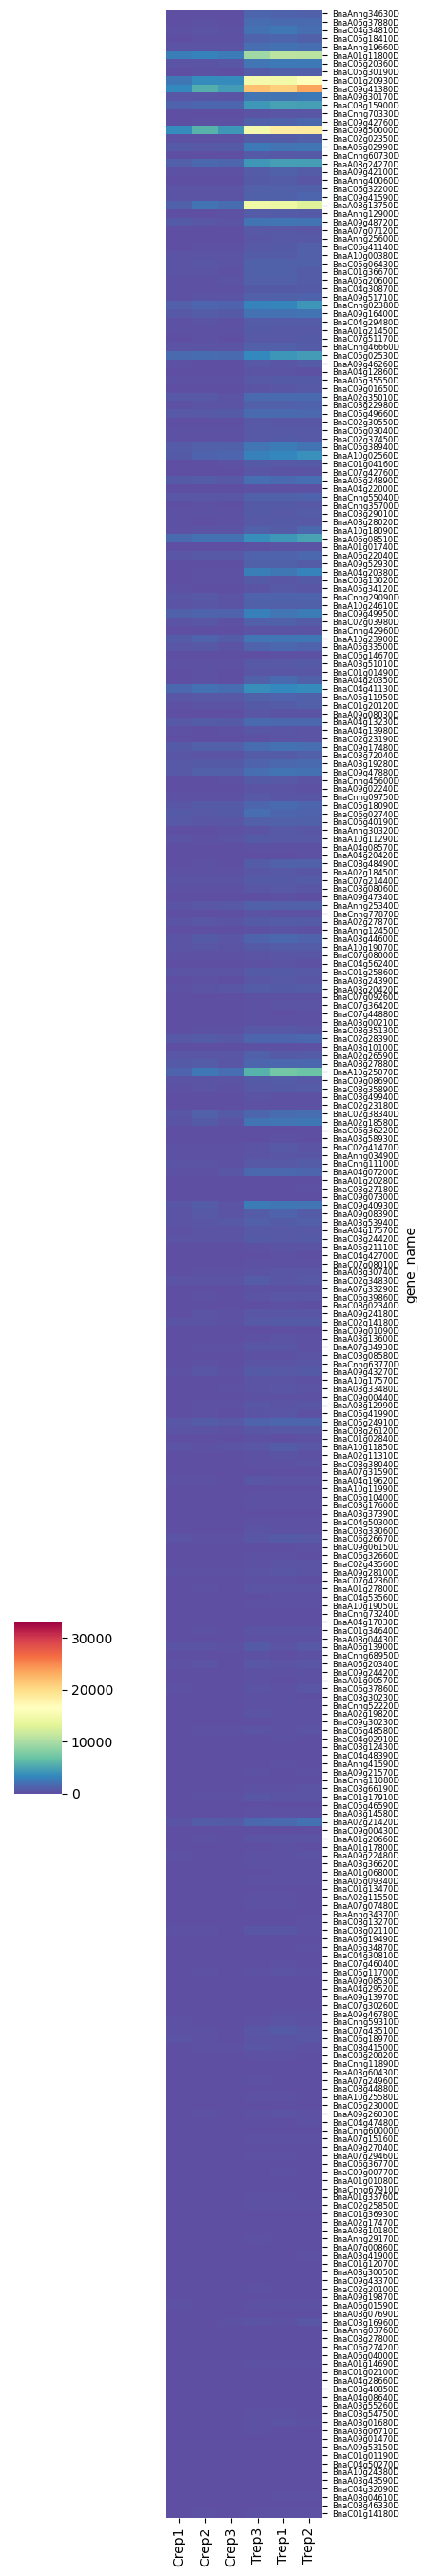

In [117]:
df_OS_up = df_up.merge(df_tomerge, how='inner').sort_values('padj')
plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
df_OS_up.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cm = sns.clustermap(df_OS_up[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r',
               vmax= max_val,
               yticklabels=True,
               row_cluster=False)

# Change proportions of heatmap
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=6)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height*3.5])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])


cm.tick_params(axis='x', rotation=90)# Rotates X-Axis Ticks by 45-degrees

plt.savefig('./analyses-Novogene/HDACOS_DEG_TM_up.png', bbox_inches='tight')
plt.show()

<Figure size 1000x10000 with 0 Axes>

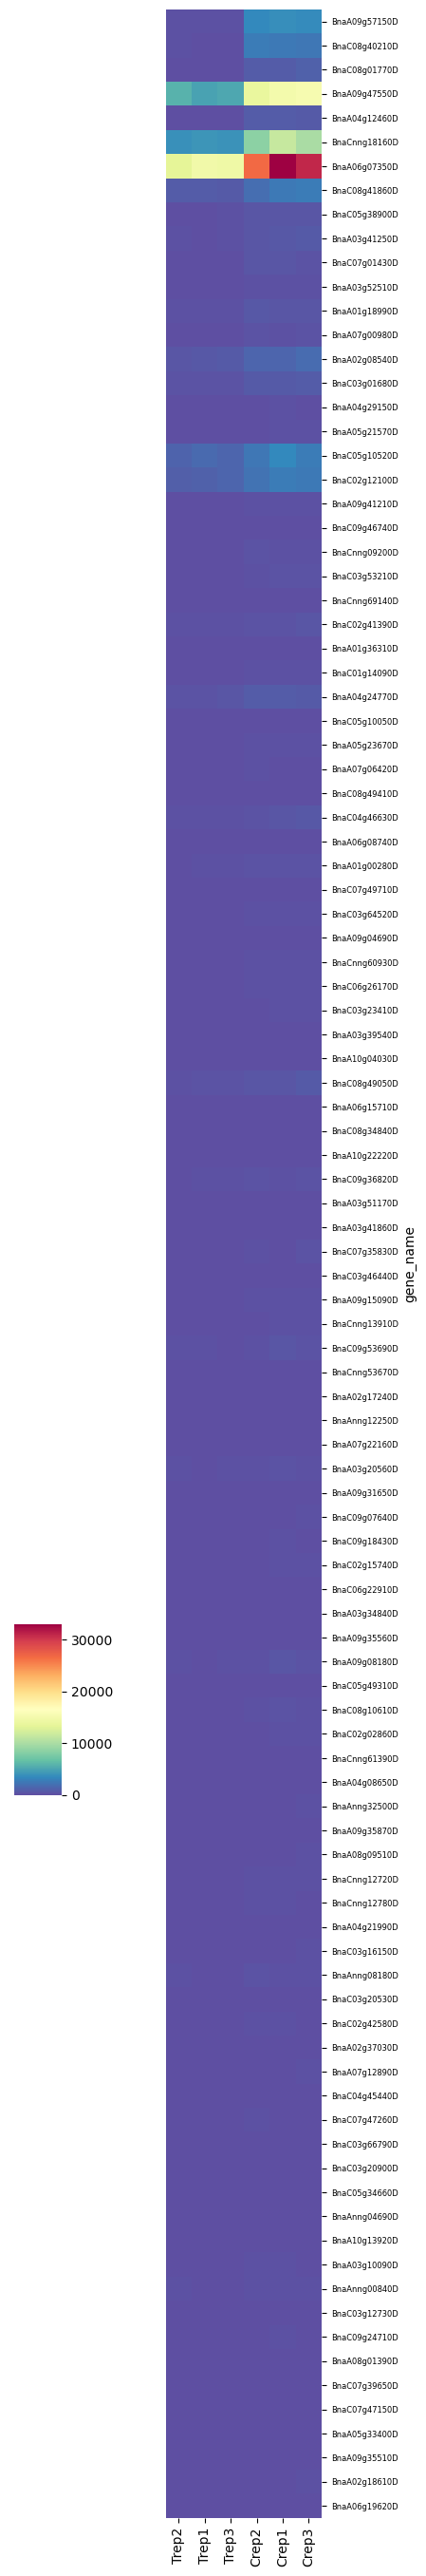

In [118]:
df_OS_down = df_down.merge(df_tomerge, how='inner').sort_values('padj')
plt.figure(figsize=(10,100))

# Specifying gene name in the ATG dataframe index
df_OS_down.set_index('gene_name', inplace=True)

# Perform clustering and plotting by TM normalized values (edgeR result???????)
cm = sns.clustermap(df_OS_down[['Trep1', 'Trep2', 'Trep3', 'Crep1', 'Crep2', 'Crep3']], 
               cmap='Spectral_r',
               vmax=max_val,
               yticklabels=True,
               row_cluster=False)

# Change proportions of heatmap
hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=6)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*0.25, hm.height*3.5])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.25, col.height*0.5])


cm.tick_params(axis='x', rotation=90)# Rotates X-Axis Ticks by 45-degrees

plt.savefig('./analyses-Nv-Sara/HDAC_OS_DEG_TM_down.png', bbox_inches='tight')
plt.show()